In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import xarray as xr

In [2]:
# rain_ds = xr.open_dataset('data/precip.nc')
# tpw_ds = xr.open_dataset('data/tpw.nc')
# rh_ds = xr.open_dataset('data/relhum.nc')

In [3]:
# rain_rate = rain_ds['precip'].values.ravel()
# atmospheric_water = tpw_ds['tpw'].values.ravel()
# relative_humidity = rh_ds['relhum'].values.ravel()

In [4]:
# df = pd.DataFrame({'RH': relative_humidity,
#                    'TPW': atmospheric_water,
#                    'RainRate': rain_rate})

In [5]:
# print(np.arange(65)*0.25+5)
# print(np.arange(37)*0.25+97)

In [6]:
# import matplotlib.pyplot as plt

In [7]:
# plt.imshow(tpw_ds['tpw'][-1,:,:])

In [8]:
# plt.imshow(rh_ds['relhum'][-1,:,:])

In [9]:
rain_df = pd.read_csv('data/history_map_rain_rate_to_2023-11-18T06_00_00.csv')
tpw_df = pd.read_csv('data/history_map_precipitable_water_to_2023-11-18T06_00_00.csv')
rh_df = pd.read_csv('data/history_map_relative_humidity_to_2023-11-18T06_00_00.csv')
t2m_df = pd.read_csv('data/history_map_temp2m_rate_to_2023-11-18T06_00_00.csv')

In [10]:
time = rain_df['date'].values
rainrate = rain_df['sum'].values

tpw_max = tpw_df['max'].values
rh_max = rh_df['max'].values
t2m_max = t2m_df['max'].values
tpw_min = tpw_df['min'].values
rh_min = rh_df['min'].values
t2m_min = t2m_df['min'].values

tpw_diff = tpw_max-tpw_min
rh_diff = rh_max-rh_min
t2m_diff = t2m_max-t2m_min

In [11]:
df = pd.DataFrame({'time': time,
                   'rainrate': rainrate,
                   'tpw_max': tpw_max,
                   'rh_max': rh_max,
                   't2m_max': t2m_max,
                   'tpw_min': tpw_min,
                   'rh_min': rh_min,
                   't2m_min': t2m_min,
                   'tpw_diff': tpw_diff,
                   'rh_diff': rh_diff,
                   't2m_diff': t2m_diff})


In [12]:
df.isna().sum()

time        0
rainrate    0
tpw_max     0
rh_max      0
t2m_max     0
tpw_min     0
rh_min      0
t2m_min     0
tpw_diff    0
rh_diff     0
t2m_diff    0
dtype: int64

In [13]:
df.columns

Index(['time', 'rainrate', 'tpw_max', 'rh_max', 't2m_max', 'tpw_min', 'rh_min',
       't2m_min', 'tpw_diff', 'rh_diff', 't2m_diff'],
      dtype='object')

In [14]:
len(df)

1418

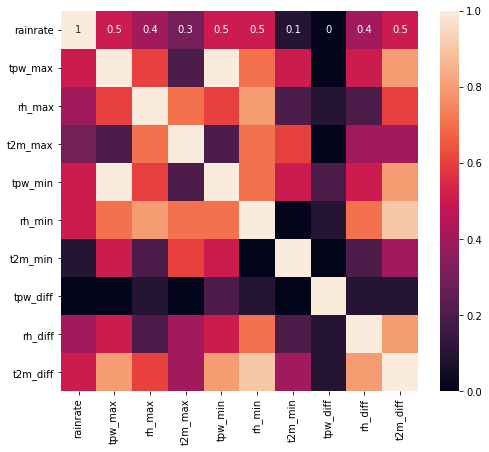

In [15]:
F = df[['rainrate', 'tpw_max', 'rh_max', 't2m_max', 'tpw_min', 'rh_min',
       't2m_min', 'tpw_diff', 'rh_diff', 't2m_diff']]
correlation_matrix = F.corr(method="pearson").round(1)
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(data=np.abs(correlation_matrix), vmin=0, vmax=1, annot=True)
plt.show()

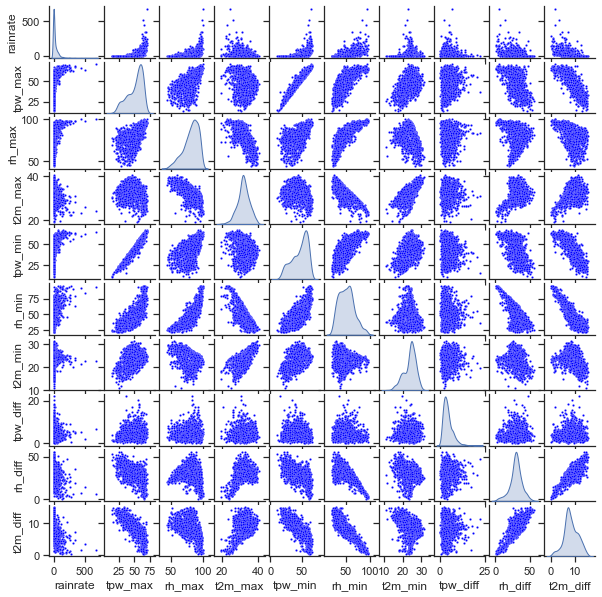

In [16]:
sns.set(style="ticks")
g = sns.pairplot(df[['rainrate', 'tpw_max', 'rh_max', 't2m_max', 'tpw_min', 'rh_min',
       't2m_min', 'tpw_diff', 'rh_diff', 't2m_diff']], diag_kind='kde', plot_kws={'alpha': 1, 's': 5, 'color': 'blue'})
g.fig.set_size_inches(8,8)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [18]:
df.head()

,time,rainrate,tpw_max,rh_max,t2m_max,tpw_min,rh_min,t2m_min,tpw_diff,rh_diff,t2m_diff
0,2020-01-01,0.0,37.930560,84.60240,32.566978,35.45760,38.96096,21.391097,2.472960,45.64144,11.175881
1,2020-01-02,0.0,35.357920,85.72112,31.660801,31.79904,40.23664,20.422991,3.558880,45.48448,11.237810
2,2020-01-03,0.0,37.110720,83.07376,31.924700,33.50656,41.71344,20.839609,3.604160,41.36032,11.085092
3,2020-01-04,0.0,39.350080,87.48608,31.290511,32.30720,44.25424,20.069861,7.042880,43.23184,11.220650
4,2020-01-05,0.0,30.103308,85.09152,31.008621,24.82400,40.03136,19.595095,5.279308,45.06016,11.413526


In [19]:
from sklearn.utils import resample

df2_0 = df[df['rainrate'] == 0]
df2_1 = df[df['rainrate'] > 0]

df2_0_ds = resample(df2_0,
                    replace=False,
                    n_samples=len(df2_0),
                    random_state=42)
df2_1_ds = resample(df2_1,
                    replace=False,
                    n_samples=len(df2_0),
                    random_state=42)

df_balanced = pd.concat([df2_0_ds, df2_1_ds])

In [20]:
df_balanced.columns

Index(['time', 'rainrate', 'tpw_max', 'rh_max', 't2m_max', 'tpw_min', 'rh_min',
       't2m_min', 'tpw_diff', 'rh_diff', 't2m_diff'],
      dtype='object')

In [21]:
X = df_balanced[['tpw_max', 'rh_max', 't2m_max', 'tpw_min', 'rh_min',
                 't2m_min', 'tpw_diff', 'rh_diff', 't2m_diff']]
Y = df_balanced['rainrate']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [23]:
X_train.shape

(782, 9)

In [24]:
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [25]:
%%time
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train_scaled, Y_train)

CPU times: user 35.9 ms, sys: 3.21 ms, total: 39.1 ms
Wall time: 38.3 ms


SVR()

In [26]:
svr_rbf.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
Y_train_pred = svr_rbf.predict(X_train_scaled)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
r2 = r2_score(Y_train, Y_train_pred)
print(f'training rmse = {rmse.round(2)}, r2 = {r2.round(2)}')

training rmse = 40.28, r2 = 0.2


In [28]:
Y_test_pred = svr_rbf.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
r2 = r2_score(Y_test, Y_test_pred)
print(f'testing rmse = {rmse.round(2)}, r2 = {r2.round(2)}')

testing rmse = 43.06, r2 = 0.18


<Axes: >

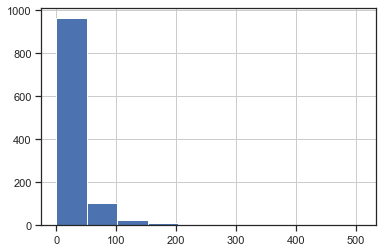

In [29]:
df_balanced['rainrate'].hist()

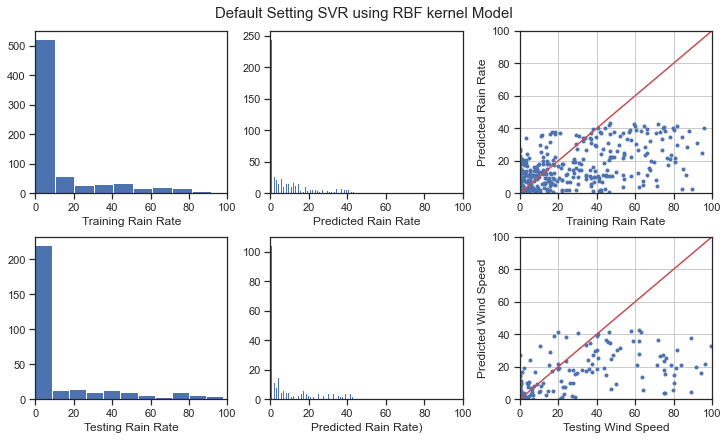

In [30]:
fig, ax = plt.subplots(2, 3, figsize=(10,6), constrained_layout = True)
ax = ax.flatten()
ax[0].hist(Y_train, bins=50)
ax[0].set_xlim(xmin=0, xmax=100)
ax[0].set_xlabel('Training Rain Rate')

ax[1].hist(Y_train_pred, bins=50)
ax[1].set_xlim(xmin=0, xmax=100)
ax[1].set_xlabel('Predicted Rain Rate')

ax[2].plot(Y_train, Y_train_pred,'.')
ax[2].axis([0, 100, 0, 100])
ax[2].plot([0, 100],[0, 100],'r')
ax[2].set_xlabel('Training Rain Rate')
ax[2].set_ylabel('Predicted Rain Rate')
#ax[2].text(0.55,0.3,train_wspd_textstr,transform=ax[2].transAxes,verticalalignment='top',fontsize=10,color='red')
ax[2].grid()

ax[3].hist(Y_test, bins=50)
ax[3].set_xlim(xmin=0, xmax=100)
ax[3].set_xlabel('Testing Rain Rate')

ax[4].hist(Y_test_pred, bins=50)
ax[4].set_xlim(xmin=0, xmax=100)
ax[4].set_xlabel('Predicted Rain Rate)')

ax[5].plot(Y_test, Y_test_pred,'.')
ax[5].axis([0, 100, 0, 100])
ax[5].plot([0, 100],[0, 100],'r')
ax[5].set_xlabel('Testing Wind Speed')
ax[5].set_ylabel('Predicted Wind Speed')
#ax[5].text(0.55,0.3,test_wspd_textstr,transform=ax[5].transAxes,verticalalignment='top',fontsize=10,color='red')
ax[5].grid()

fig.suptitle('Default Setting SVR using RBF kernel Model', fontsize=15)

outfile='rain_svr_default'
plt.savefig(outfile,bbox_inches='tight',pad_inches = 0.1,dpi=200)

plt.show()

In [31]:
%%time
param_grid = {
    'C': [0.5, 1, 10, 100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# perform a grid search over the hyperparameters
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train)

# print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best score:  0.41977017112045995
CPU times: user 5.57 s, sys: 71.7 ms, total: 5.64 s
Wall time: 5.76 s


In [32]:
%%time
svr_rbf_op = SVR(kernel='rbf', C=100, gamma='scale')
svr_rbf_op.fit(X_train_scaled, Y_train)

CPU times: user 158 ms, sys: 5.4 ms, total: 163 ms
Wall time: 163 ms


SVR(C=100)

In [33]:
Y_train_pred = svr_rbf_op.predict(X_train_scaled)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_pred)))
r2 = r2_score(Y_train, Y_train_pred)
print(f'training rmse = {rmse.round(2)}, r2 = {r2.round(2)}')

training rmse = 33.09, r2 = 0.46


In [34]:
Y_test_pred = svr_rbf_op.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_pred)))
r2 = r2_score(Y_test, Y_test_pred)
print(f'testing rmse = {rmse.round(2)}, r2 = {r2.round(2)}')

testing rmse = 35.12, r2 = 0.46


In [36]:
Y_train

771       0.000000
1155      0.000000
114       4.465152
162       0.000000
180      45.176832
           ...    
1036      0.000000
18        0.000000
629     106.787690
1240     46.327321
1291      1.791922
Name: rainrate, Length: 782, dtype: float64

In [43]:
len(Y_train_pred), Y_train_pred

(782,
 array([ 1.79194858e+00,  8.22559313e-02,  1.68319908e+00,  4.37575858e+00,
         1.54551084e+01, -1.21676947e-01,  9.99552395e-02, -9.98873296e-02,
         5.94008040e+01, -2.66886801e+00,  2.97105886e-02,  8.49979697e+00,
         5.24901284e+00, -1.00228848e-01,  1.28070498e-01, -1.00159815e-01,
         1.00120623e-01, -1.00300869e-01,  1.03123349e+01,  9.97194366e-02,
         2.80118135e+01,  9.99845077e-02,  5.53552815e-01,  1.67649059e+00,
         4.86163547e+01, -8.32967748e-02,  2.78421605e-02, -5.43156490e-01,
         5.41650024e-01, -1.00266151e-01,  7.79850609e+01, -9.99694711e-02,
         2.79318691e+01,  8.02520053e+01,  1.34868175e+00,  8.47008288e-01,
         4.81136537e+00,  1.00170262e-01, -3.42275591e-01, -1.13556451e+00,
         2.31257695e-01,  9.99716661e-02,  9.73930507e-01,  9.99147902e-02,
        -1.00011684e-01,  3.33391671e+00,  8.82349980e-03, -5.58422881e-02,
         1.06952447e+00,  1.00202628e-01,  1.60233126e-01,  1.19484511e+01,
      

In [40]:
Y_train

771       0.000000
1155      0.000000
114       4.465152
162       0.000000
180      45.176832
           ...    
1036      0.000000
18        0.000000
629     106.787690
1240     46.327321
1291      1.791922
Name: rainrate, Length: 782, dtype: float64

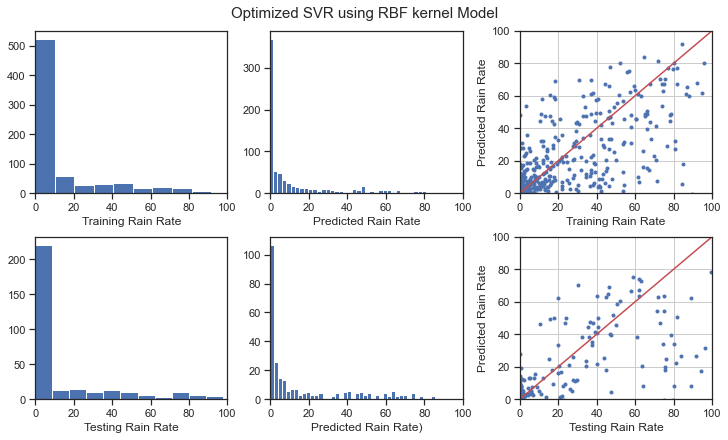

In [35]:
fig, ax = plt.subplots(2, 3, figsize=(10,6), constrained_layout = True)
ax = ax.flatten()
ax[0].hist(Y_train, bins=50)
ax[0].set_xlim(xmin=0, xmax=100)
ax[0].set_xlabel('Training Rain Rate')

ax[1].hist(Y_train_pred, bins=50)
ax[1].set_xlim(xmin=0, xmax=100)
ax[1].set_xlabel('Predicted Rain Rate')

ax[2].plot(Y_train, Y_train_pred,'.')
ax[2].axis([0, 100, 0, 100])
ax[2].plot([0, 100],[0, 100],'r')
ax[2].set_xlabel('Training Rain Rate')
ax[2].set_ylabel('Predicted Rain Rate')
#ax[2].text(0.55,0.3,train_wspd_textstr,transform=ax[2].transAxes,verticalalignment='top',fontsize=10,color='red')
ax[2].grid()

ax[3].hist(Y_test, bins=50)
ax[3].set_xlim(xmin=0, xmax=100)
ax[3].set_xlabel('Testing Rain Rate')

ax[4].hist(Y_test_pred, bins=50)
ax[4].set_xlim(xmin=0, xmax=100)
ax[4].set_xlabel('Predicted Rain Rate)')

ax[5].plot(Y_test, Y_test_pred,'.')
ax[5].axis([0, 100, 0, 100])
ax[5].plot([0, 100],[0, 100],'r')
ax[5].set_xlabel('Testing Rain Rate')
ax[5].set_ylabel('Predicted Rain Rate')
#ax[5].text(0.55,0.3,test_wspd_textstr,transform=ax[5].transAxes,verticalalignment='top',fontsize=10,color='red')
ax[5].grid()

fig.suptitle('Optimized SVR using RBF kernel Model', fontsize=15)

outfile='rain_svr_op_default'
plt.savefig(outfile,bbox_inches='tight',pad_inches = 0.1,dpi=200)

plt.show()